# Task # 2 - To Explore Supervised Machine Learning


**Created by- Aradhit Das
  Email id- aradhitd@gmail.com
  LinkedIn- https://www.linkedin.com/in/aradhit-das-5a646a191/**

### **Importing Libraries and Visualizing the data**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
path="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(path)

In [127]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [128]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [129]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [130]:
df["Scores"]=df["Scores"].astype("float")

(0, 106.64788906233105)

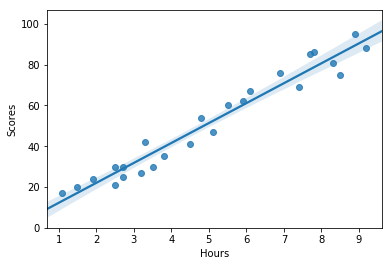

In [131]:
%matplotlib inline 
sns.regplot(x="Hours", y="Scores", data=df)
plt.ylim(0,)

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [132]:
from sklearn.model_selection import train_test_split
x=df[["Hours"]]
y=df["Scores"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

**Here,we use 35% of the data as testing data and 65% of the data for training the model.**

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [134]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

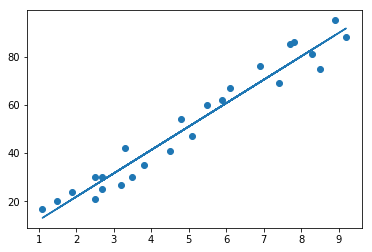

In [135]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [136]:
#Checking the accuracy score of the model for test dataset
lr.score(X_test,y_test)

0.955570080138813

v
Now that we have trained our algorithm, it's time to make some predictions.

In [137]:
# Predicting the scores for test dataset and comparing Actual vs Predicted
y_pred = lr.predict(X_test)
daf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
daf 

,Actual,Predicted
5,20.0,17.042892
2,27.0,33.516954
19,69.0,74.217577
16,30.0,26.733516
11,62.0,59.681640
22,35.0,39.331329
17,24.0,20.919142
24,86.0,78.093827
23,76.0,69.372265


In [138]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.14523314523314


**The accuracy of the model in predicting the data in this case is 92.14%**

### **Increasing the accuracy of the predictions**

We can further improve the accuracy of the model by fitting a polynomial line instead of a simple linear line. 

In [139]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=3)
pr

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [140]:
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)

In [141]:
lr.fit(X_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
lr.score(X_test_pr,y_test)

0.9656095628542211

In [143]:
y_pred1 = lr.predict(X_test_pr)
daf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})  
daf 

,Actual,Predicted
5,20.0,18.284713
2,27.0,31.717266
19,69.0,77.438036
16,30.0,25.238479
11,62.0,62.144817
22,35.0,38.016060
17,24.0,20.687281
24,86.0,80.716810
23,76.0,72.788345


In [144]:
predicted=lr.predict(pr.fit_transform([[hours]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predicted[0]))

No of Hours = 9.25
Predicted Score = 88.22539597907289
